<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
(5110, 12)
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_typ

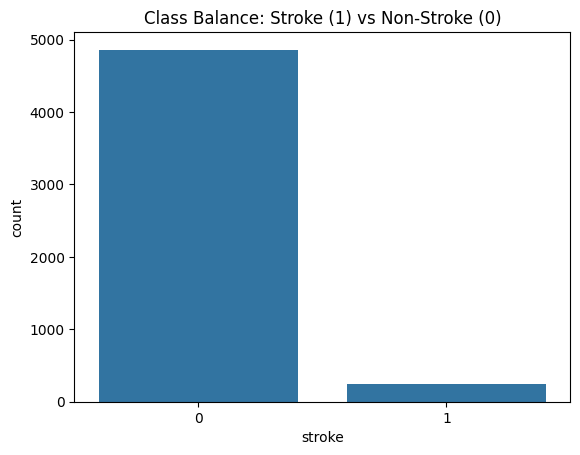

Stroke distribution:
 stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


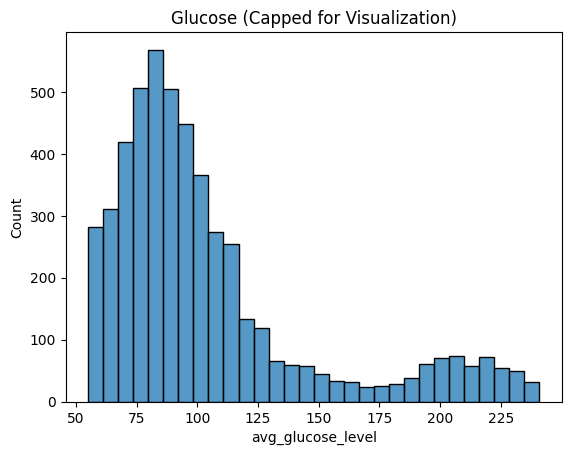

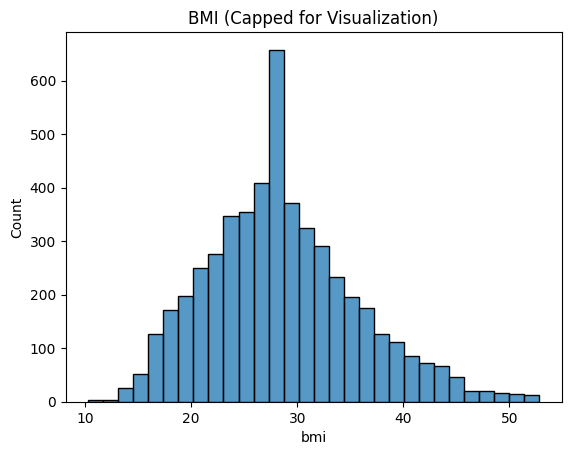

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
smoking_known        0
dtype: int64
✅ Clean dataset saved at: ../data/stroke_clean.csv


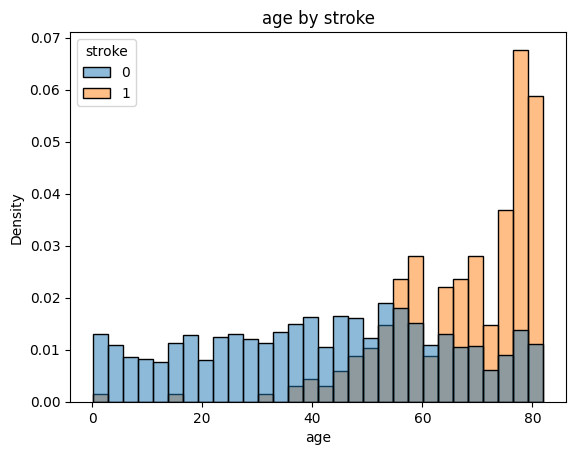

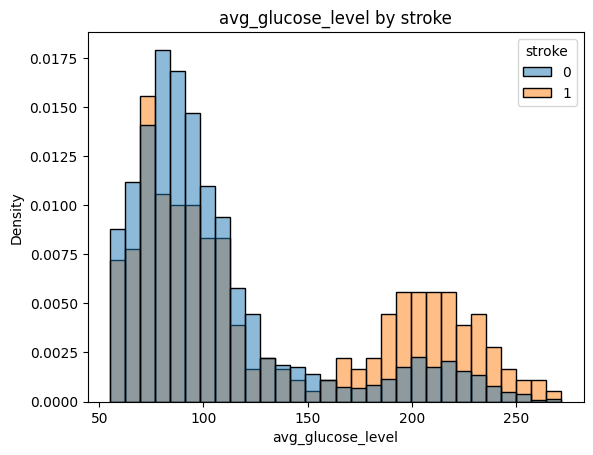

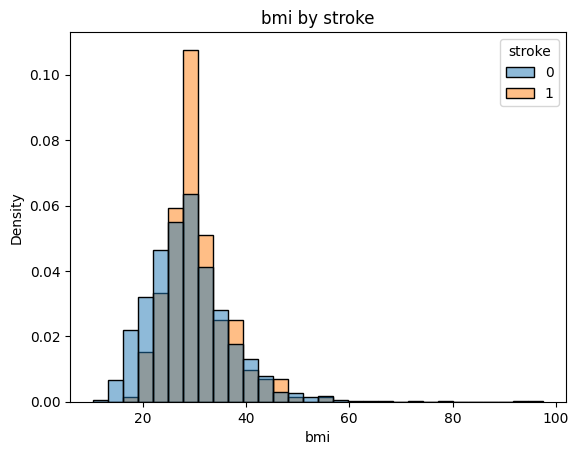

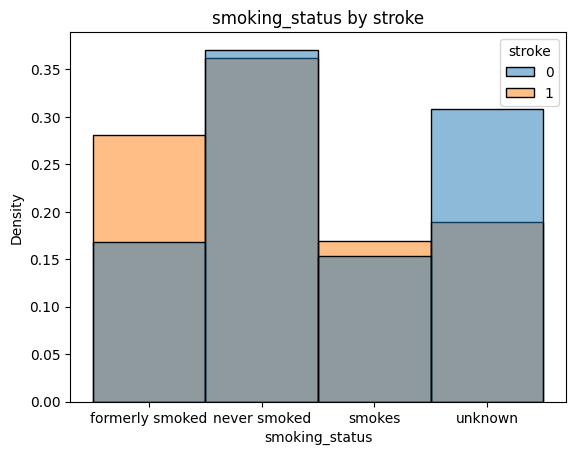

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option("display.max_columns", 200)

DATA_PATH = Path("../data/raw_dataset.csv") #Load and Read file
df = pd.read_csv(DATA_PATH)
df.head(10)
# df.tail()



# Structure inspection, Target Distribution, and Balance
df.info()
df.select_dtypes(include='number').describe()



# --- 1. Load raw data ---
raw_path = Path("../data/raw_dataset.csv") 
df = pd.read_csv(raw_path)
print(df.shape)
df.head()

# --- 2. Handle Missing Values ---
print(df.isna().sum())

# Impute BMI with median - Median is at 28.1 - that's what we use
df["bmi"] = df["bmi"].fillna(df["bmi"].median())
# Clean categorical smoking values
df["smoking_status"] = df["smoking_status"].astype(str).str.lower().fillna("unknown")
df["smoking_known"] = (df["smoking_status"] != "unknown").astype(int)

# --- 3. Normalize Categorical Text ---
cat_cols = ["gender","work_type","Residence_type","smoking_status"]
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip().str.lower()

# --- 4. Handle Rare/Invalid Entries ---
df["gender"] = df["gender"].replace({"other":"male"})  # merge rare category

# --- 5. Visualize Class Balance ---
sns.countplot(x="stroke", data=df)
plt.title("Class Balance: Stroke (1) vs Non-Stroke (0)")
plt.show()

# Compute class ratio
ratio = df["stroke"].value_counts(normalize=True)
print("Stroke distribution:\n", ratio)

# --- 6. Cap Outliers (for visualization, not model) ---
# define upper caps (99th percentile)
glucose_cap = df["avg_glucose_level"].quantile(0.99)
bmi_cap = df["bmi"].quantile(0.99)

# Visualize capped distributions
sns.histplot(df[df["avg_glucose_level"]<glucose_cap]["avg_glucose_level"], bins=30)
plt.title("Glucose (Capped for Visualization)")
plt.show()

sns.histplot(df[df["bmi"]<bmi_cap]["bmi"], bins=30)
plt.title("BMI (Capped for Visualization)")
plt.show()

# --- 7. Confirm final cleanliness ---
print(df.isna().sum())

# --- 8. Save final cleaned dataset ---
clean_path = Path("../data/stroke_clean.csv")
clean_path.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(clean_path, index=False)
print(f"✅ Clean dataset saved at: {clean_path}")



# Check for missisng values
df.isna().sum().sort_values(ascending=False)

# quick distributions (numeric)
num_cols = ['age','avg_glucose_level','bmi', 'smoking_status']
for col in num_cols:
    if col in df.columns:
        sns.histplot(df, x=col, hue='stroke', bins=30, stat='density', common_norm=False)
        plt.title(f'{col} by stroke')
        plt.show()
        plt.savefig('my_figure.png', dpi=300, bbox_inches='tight')


(5110, 12)
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


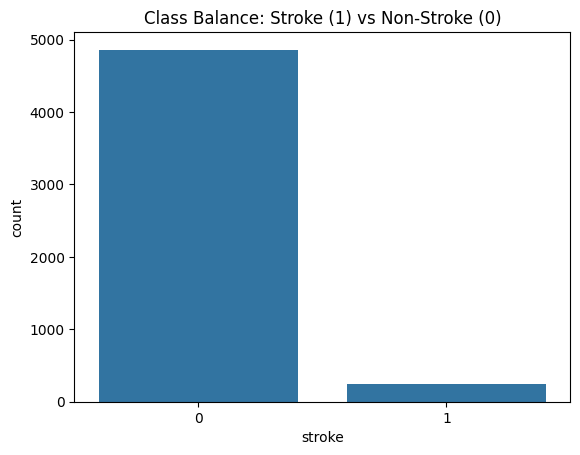

Stroke distribution:
 stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


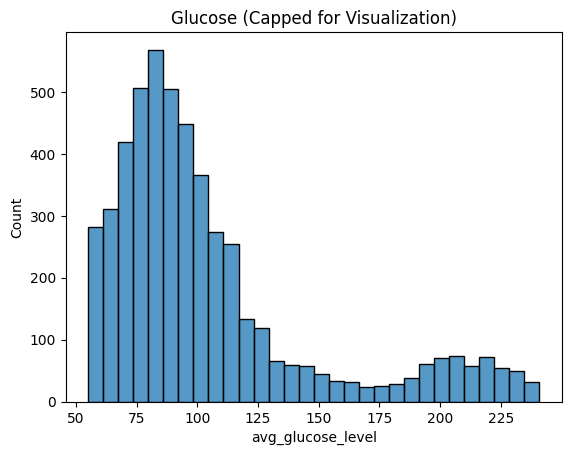

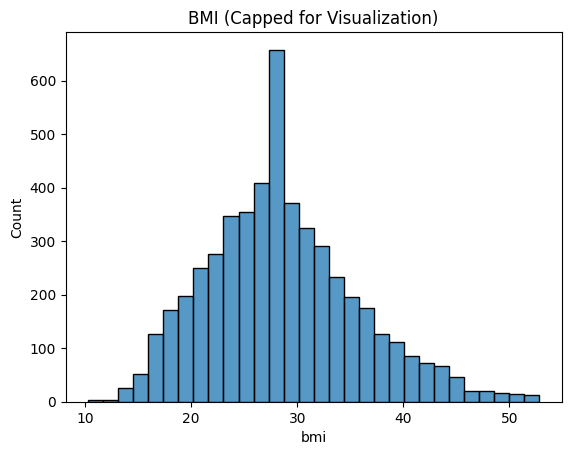

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
✅ Clean dataset saved at: ../data/stroke_clean.csv


In [7]:
# So from now henceforth we use the cleaned data version (../data/stroke_clean.csv)
# I have clean data now - no missing
